In [1]:
from autolens.data.array import grids
from autolens.data.array.plotters import grid_plotters

# In this example, we'll create grids of Cartesian (y,x) coordinates, representing the arc-second coordinate grid of
# an observed data-set (e.g. ccd imaging).

In [3]:
# In PyAutoLens, a grid is a set of two-dimensional (y,x) coordinates (in arc-seconds) that are deflected
# and traced by a strong lensing system.

# This coordinate grid is aligned with the image we analyze, such that each coordinate on a 'regular' grid maps to the
# centre of each image-pixel. Lets make a regular grid using 100 x 100 pixels, with a pixel scale (arcsecond-to-pixel
# conversion factor) of 0.05", giving us a a 5" x 5" grid.
regular_grid = grids.RegularGrid.from_shape_and_pixel_scale(shape=(100, 100), pixel_scale=0.05)


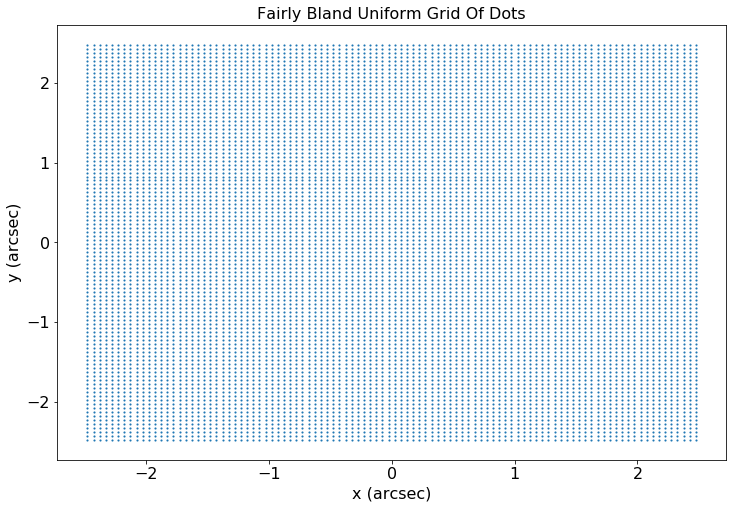

In [4]:
# First, lets plot this regular grid, which shows that it is a fairly bland uniform grid of dots.
grid_plotters.plot_grid(grid=regular_grid, title='Fairly Bland Uniform Grid Of Dots')

In [5]:
# We can print each coordinate of this regular grid, revealing that it consists of a set of arc-second coordinates
# (where the spacing between each coordinate corresponds to the 'pixel_scale' of 0.05" defined above)
print('(y,x) regular-pixel 1:')
print(regular_grid[0])
print('(y,x) regular-pixel 2:')
print(regular_grid[1])
print('(y,x) regular-pixel 3:')
print(regular_grid[2])
print('(y,x) regular-pixel 101:')
print(regular_grid[100])
print('etc.')

(y,x) regular-pixel 1:
[ 2.475 -2.475]
(y,x) regular-pixel 2:
[ 2.475 -2.425]
(y,x) regular-pixel 3:
[ 2.475 -2.375]
(y,x) regular-pixel 101:
[ 2.425 -2.475]
etc.


In [6]:
# (PyAutoLens actually flattens the NumPy array to 1D to save memory, however it consists of all
# 10000 pixel coordinates on our 2D grid)
print(regular_grid.shape)

(10000, 2)


In [7]:
# PyAutoLens uses many different types of grids, for performing many different calculations. For example, a sub-grid
# splits each pixel on the regular grid above into a sub-pixel of size (sub_grid_size x sub_grid_size):
sub_grid = grids.SubGrid.from_shape_pixel_scale_and_sub_grid_size(shape=(100, 100), pixel_scale=0.05,
                                                                  sub_grid_size=2)


In [8]:
# We specified a sub_grid_size of 2 above, therefore we expect 4 (2 x 2) times more sub-pixels than regular-pixels
# (which like the regular grid are again flattened to 1D).
print(sub_grid.shape)

(40000, 2)


In [9]:
# The first four pixels of our sub-grid correspond to the first four sub-pixels, which form a sub-grid inside the
# first regular-grid pixel, as follows:

# Regular pixel 1:
#              _________
#              |         |
#              |         |  o = (y,x) centre of regular-
# y = 2.475"   |    o    |       grid coordinate.
#              |         |
#              |_________|
#              x = -2.475

# Sub-pixels 1, 2, 3 & 4:
#               _________
#              |         |
#              |  o   o  |  o = (y,x) centre of sub-
# y = 2.475"   |         |       grid coordinates.
#              |  o   o  |
#              |_________|
#              x = -2.475

# The sub-pixels coordinate are spaced uniformly between the regular-pixel's edges 
# (which are at y = (2.45", 2.5") and x = (-2.5". -2.45") )
print('(y,x) sub-pixel 1 (of regular pixel 1):')
print(sub_grid[0])
print('(y,x) sub-pixel 2 (of regular pixel 1):')
print(sub_grid[1])
print('(y,x) sub-pixel 3 (of regular pixel 1):')
print(sub_grid[2])
print('(y,x) sub-pixel 4 (of regular pixel 1):')
print(sub_grid[3])

(y,x) sub-pixel 1 (of regular pixel 1):
[ 2.48333333 -2.48333333]
(y,x) sub-pixel 2 (of regular pixel 1):
[ 2.48333333 -2.46666667]
(y,x) sub-pixel 3 (of regular pixel 1):
[ 2.46666667 -2.48333333]
(y,x) sub-pixel 4 (of regular pixel 1):
[ 2.46666667 -2.46666667]


In [10]:
# The sub-grid then continues on to the next regular-grid pixels (and so on)
print('(y,x) sub-pixel 1 (of regular pixel 2):')
print(sub_grid[4])
print('(y,x) sub-pixel 2 (of regular pixel 2):')
print(sub_grid[5])
print('etc.')

# This coordinate sub-sampling allows calculations to be performed a higher resolution and 
# thus greater numerical accuracy.

(y,x) sub-pixel 1 (of regular pixel 2):
[ 2.48333333 -2.43333333]
(y,x) sub-pixel 2 (of regular pixel 2):
[ 2.48333333 -2.41666667]
etc.


In [11]:
# Finally, it is convenient for PyAutoLens to 'group' all of its grid into one object, which we call a 'grid-stack'.
# A grid stack consists of a set of aligned grids, for example, the regular and sub-grids above, but also other grids
# which we will explain throughout these tutorials. Making a grid-stack is as simple as above.
grid_stack = grids.GridStack.from_shape_pixel_scale_and_sub_grid_size(shape=(100, 100), pixel_scale=0.05,
                                                                      sub_grid_size=2)

In [12]:
# The grid-stack coordinates are indeed identical to the individual grids above
print('(y,x) regular-pixel 1:')
print(grid_stack.regular[0])
print('(y,x) regular-pixel 2:')
print(grid_stack.regular[1])
print('(y,x) sub-pixel 1 (of regular pixel 1):')
print(grid_stack.sub[0])
print('(y,x) sub-pixel 2 (of regular pixel 1):')
print(grid_stack.sub[1])
print('(y,x) sub-pixel 3 (of regular pixel 1):')
print(grid_stack.sub[2])
print('(y,x) sub-pixel 4 (of regular pixel 1):')
print(grid_stack.sub[3])

(y,x) regular-pixel 1:
[ 2.475 -2.475]
(y,x) regular-pixel 2:
[ 2.475 -2.425]
(y,x) sub-pixel 1 (of regular pixel 1):
[ 2.48333333 -2.48333333]
(y,x) sub-pixel 2 (of regular pixel 1):
[ 2.48333333 -2.46666667]
(y,x) sub-pixel 3 (of regular pixel 1):
[ 2.46666667 -2.48333333]
(y,x) sub-pixel 4 (of regular pixel 1):
[ 2.46666667 -2.46666667]


In [ ]:
# Congratulations, you've completed your first PyAutoLens tutorial! Before moving on to the next one, experiment with
# PyAutoLens by doing the following:

# 1) Change the pixel-scale of the grids - what happens to the Cartesian coordinates?
# 2) Change the resolution of the grids - what happens Cartesian coordinates?
# 3) Change the sub-grid size - what do you note about the pixel-scale of sub pixels?